In [1]:
#we import libraries as necessary
import pandas as pd
import re
import src.cleaning as clean
import src.manipulating_df as man
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#we wil import our previously cleaned worldwide_emissions cvs file to take conclusions out of it
world_emissions=man.open_cvs()
#world_emissions file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
world_emissions


In [159]:
# we check that the DataFrame exportation is correct
world_emissions.head(20)

,Year,CO2_emissions,Year_interval
0,1751,0.00,1750
1,1752,0.00,1750
2,1753,0.00,1750
3,1754,0.00,1750
4,1755,0.00,1750
5,1756,0.01,1750
6,1757,0.01,1750
7,1758,0.01,1750
8,1759,0.01,1750
9,1760,0.01,1750


#### We want to see CO2 total emission through History, and on average by year

In [110]:
world_emissions["Year_interval"] =pd.cut(world_emissions['Year'],[1750,1800,1850,1900,1950,2000,2050],labels=['1750','1800','1850','1900','1950','2000'])
world_emissions_years=world_emissions.groupby(['Year_interval']).agg({"CO2_emissions":["sum","mean"]})
clean.rounding(world_emissions_years)

CO2_emissions        
                        sum    mean
Year_interval                      
1750                   1.61    0.03
1800                  10.90    0.22
1850                  92.28    1.85
1900                 637.08   12.74
1950                2791.90   55.84
2000                2216.00  130.35

<Figure size 576x576 with 0 Axes>

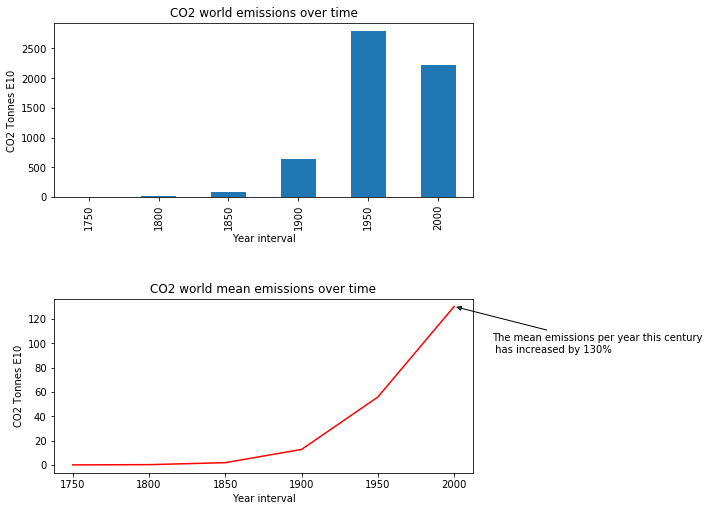

<Figure size 576x576 with 0 Axes>

In [126]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
world_emissions_years['CO2_emissions',  'sum'].plot.bar(xlabel='Year interval',ylabel='CO2 Tonnes E10',title='CO2 world emissions over time')

plt.tight_layout(pad=5.50)
plt.subplot(2,1,2)
world_emissions_years['CO2_emissions',  'mean'].plot(xlabel='Year interval',ylabel='CO2 Tonnes E10',title='CO2 world mean emissions over time',c='r')
plt.annotate('The mean emissions per year this century \n has increased by 130%',xy=(5,130.35), xytext=(5.5,100),arrowprops={'arrowstyle': '-|>'}, va='center')
plt.figure(figsize=(8,8))


In [130]:
#we wil import our previously cleaned vehicles cvs file to take conclusions out of it
vehicles=man.open_cvs()
#vehicles file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
biggest_emissors


### European Comission Expects ZERO CO2 emissions in 2050

### CO2 emissions produced by vehicles worldwide

In [145]:
#we wil import our previously cleaned register cvs file to take conclusions out of it
register=man.open_cvs()
#register file in src folder

Please, enter the folder where your cvs file is saved:
src
Please, enter the name for the cvs file you want to open without extension:
register


In [155]:
# we check that the DataFrame exportation is correct
register.head()

,Country,Year,Number_of_registered_vehicles
0,Afghanistan,2013,655 357
1,Albania,2016,563 106
2,Antigua and Barbuda,2016,36 030
3,Argentina,2016,21 633 587
4,Australia,2016,18 326 236


In [158]:
register_2017=register[register['Year']==2013].sum()
register_2017

Country                          0.0
Year                             0.0
Number_of_registered_vehicles    0.0
dtype: float64